In [ ]:
"test.csv"[-4:]

'.csv'

In [ ]:
import os

dir = "dataset"

for root, dirs, files in os.walk(dir):
    level = root.replace(dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        if f[-4:] == ".csv":
            continue
        print('{}{}'.format(subindent, f))

dataset/
    D1_3/
        D1_3_3/
            ID_1/
                round_3/
                    phase3/
                    phase1/
                    phase2/
                round_4/
                    phase3/
                    phase2/
                    phase1/
                round_2/
                    phase3/
                    phase2/
                    phase1/
                round_1/
                    phase3/
                    phase2/
                    phase1/
            ID_2/
                round_2/
                    phase1/
                    phase2/
                    phase3/
                round_1/
                    phase3/
                    phase2/
                    phase1/
                round_3/
                    phase3/
                    phase2/
                    phase1/
                round_4/
                    phase1/
                    phase2/
                    phase3/
        D1_3_4/
            ID_2/
                round_1

In [5]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dir = "dataset"

measurements = ["BVP", "EDA", "HR", "TEMP"]
cols = ["chord", "person", "round", "phase", "sample_nr", "datetime"] + measurements
#print(cols)

df = pd.DataFrame(columns = cols)
#lengths = dict()
#for m in measurements:
#    lengths[m] = list()

freqs = {
    "BVP": 64,
    "TEMP": 4,
    "EDA": 4,
    "HR": 1
}

count = 0
for root, dirs, files in os.walk(dir):
    if len(dirs) == 0:
        # Split D1_3 into its subsets
        path = root.replace("D1_3/", "")
        path_comp = path.split("/")

        # Assign experiment variables
        chord, person, round, phase = path_comp[1:]

        entry = pd.DataFrame(columns = cols)

        first = True
        for m in measurements:
            filepath = root + "/" + m + ".csv"
            temp_data = pd.read_csv(filepath, index_col = "time") # Takes about 10 seconds to load all



            #lengths[m].append(len(temp_data))
            #entry[m] = temp_data[m]

            #print(len(temp_data))
            #print(temp_data)
            #print()

            first = False
            
        #print(entry)
    '''
    count += 1
    if count > 0:
        break
    '''

In [9]:
print(lengths)

{'BVP': [19978, 14473, 19900, 19911, 20472, 19535, 19674, 19945, 19079, 18144, 20308, 15854, 19063, 19929, 19669, 18272, 20210, 15817, 19954, 19853, 14301, 19559, 20544, 19952, 19861, 21285, 19984, 19648, 20900, 19641, 19414, 19532, 19666, 19749, 19584, 19374, 19682, 20859, 19629, 20025, 21074, 19815, 19705, 19401, 19747, 19840, 19586, 19387, 15533, 16653, 20535, 19413, 19815, 19181, 19620, 19632, 19440, 19698, 19390, 19126, 15535, 16886, 20437, 19484, 19844, 19003, 19769, 19701, 19385, 19730, 19134, 19641, 19396, 19563, 19627, 19748, 19065, 19714, 16811, 20548, 15639, 19184, 19824, 19337, 19563, 19714, 19339, 19636, 19564, 19172, 19484, 19767, 19208, 20599, 16865, 15481, 19485, 20142, 19833, 18955, 16650, 20015, 20382, 19459, 19655, 19472, 20425, 19472, 19798, 19545, 19774, 18788, 20160, 16633, 20359, 19479, 19518, 19387, 20524, 19440, 19538, 20158, 19732, 18855, 16647, 20100, 19305, 20487, 19373, 19431, 20345, 19630, 19429, 19461, 20377, 20658, 19437, 19344, 19629, 19550, 19945, 1886

BVP
Min:	14301
Max:	28649
Mean:	19896
Std:	1964



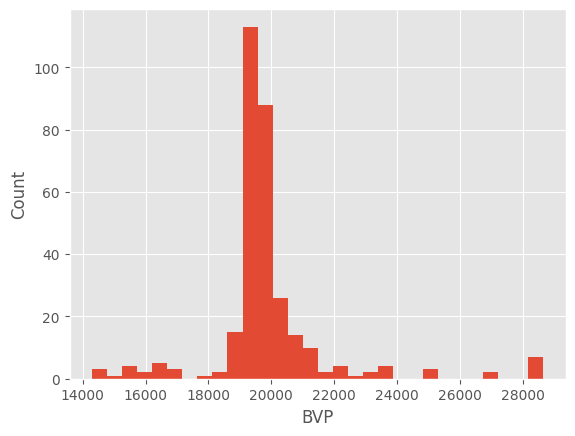

EDA
Min:	894
Max:	1790
Mean:	1243
Std:	122



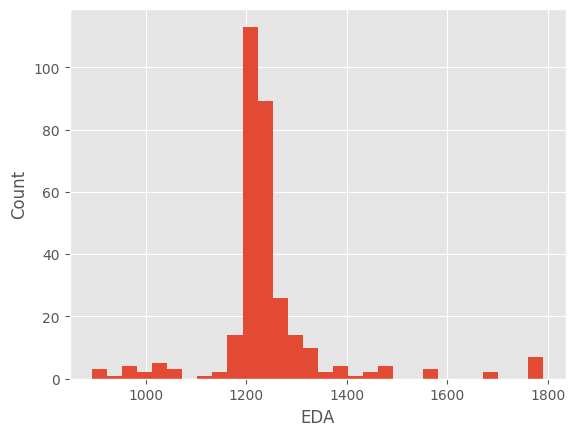

HR
Min:	224
Max:	448
Mean:	310
Std:	30



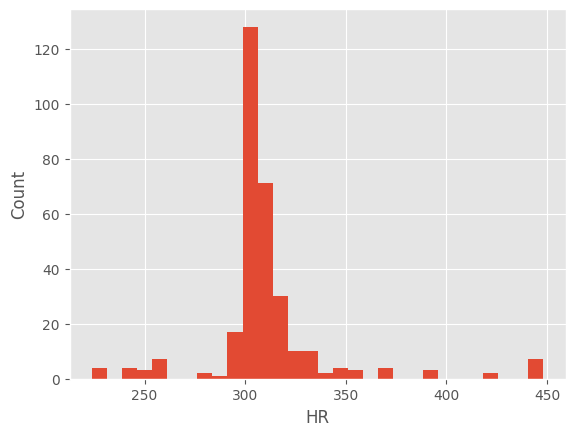

TEMP
Min:	894
Max:	1790
Mean:	1243
Std:	122



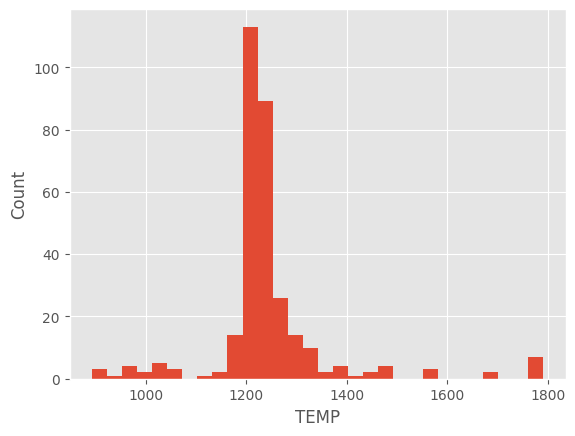

'\nplt.style.use("ggplot")\nplt.hist(e_len, bins = 30)\nplt.xlabel("HR")\nplt.ylabel("Count")\nplt.show()\n'

In [11]:
plt.style.use("ggplot")

for m in measurements:
    e_len = np.array(lengths[m])
    print(m)
    print("Min:\t%d" %e_len.min())
    print("Max:\t%d" %e_len.max())
    print("Mean:\t%d" %e_len.mean())
    print("Std:\t%d" %e_len.std())
    print()
    plt.hist(e_len, bins = 30)
    plt.xlabel(m)
    plt.ylabel("Count")
    plt.show()


In [33]:
print(np.where(np.array(lengths["HR"]) < 300, 1, 0).sum() / len(lengths["HR"]) * 100)
print(np.where(np.array(lengths["HR"]) == 300, 1, 0).sum() / len(lengths["HR"]) * 100)
print(np.where(np.array(lengths["HR"]) > 300, 1, 0).sum() / len(lengths["HR"]) * 100)

14.102564102564102
2.564102564102564
83.33333333333334


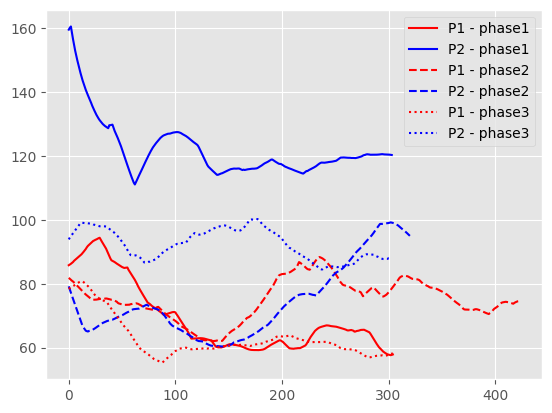

In [22]:
# Comparator
measure = "HR"
path_1 = "dataset/D1_1/ID_3/round_2"
path_2 = "dataset/D1_3/D1_3_2/ID_4/round_2"

phases = ["phase1", "phase2", "phase3"]
styles = ["-", "--", ":"]

for i in range(len(phases)):
    p = phases[i]
    s = styles[i]

    # Person 1
    filepath = "/".join([path_1, p, measure + ".csv"])
    data = pd.read_csv(filepath)
    plt.plot(list(data[measure]), "r" + s, label = "P1 - " + p)
    
    # Person 2
    filepath = "/".join([path_2, p, measure + ".csv"])
    data = pd.read_csv(filepath)
    plt.plot(list(data[measure]), "b" + s, label = "P2 - " + p)

plt.legend()
plt.show()



In [49]:
data = pd.read_csv("dataset/D1_1/ID_3/round_2/phase1/BVP.csv")

data["time_converted"] = pd.to_datetime(data["time"])
start_time = min(data["time_converted"])
print(start_time)

data["time_seconds"] = data["time_converted"].apply(lambda x: (x - start_time).total_seconds())

data

2021-12-17 16:42:24.671875


,Unnamed: 0,BVP,time,time_converted,time_seconds
0,0,-136.21,2021-12-17 16:42:24.671875,2021-12-17 16:42:24.671875,0.000000
1,1,-135.95,2021-12-17 16:42:24.687500,2021-12-17 16:42:24.687500,0.015625
2,2,-132.41,2021-12-17 16:42:24.703125,2021-12-17 16:42:24.703125,0.031250
3,3,-127.30,2021-12-17 16:42:24.718750,2021-12-17 16:42:24.718750,0.046875
4,4,-122.49,2021-12-17 16:42:24.734375,2021-12-17 16:42:24.734375,0.062500
...,...,...,...,...,...
19501,19501,-0.47,2021-12-17 16:47:29.375000,2021-12-17 16:47:29.375000,304.703125
19502,19502,-1.53,2021-12-17 16:47:29.390625,2021-12-17 16:47:29.390625,304.718750
19503,19503,-1.83,2021-12-17 16:47:29.406250,2021-12-17 16:47:29.406250,304.734375
19504,19504,-1.70,2021-12-17 16:47:29.421875,2021-12-17 16:47:29.421875,304.750000


In [50]:
from data import get_data

test = get_data()
test

KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aad321cd-5b13-4522-860e-4bbfa7104698' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>